In [1]:
import pandas as pd

In [4]:
experiments = 1
epochs = 30

# activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'PReLU', 'ThresholdedReLU']
activations = ['hard_sigmoid']
# optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
            'data' : [pd.read_csv('./logs/mnist_cnn_' + act +'_' + opt + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [5]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [6]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
0,hard_sigmoid_rmsp,0.0,0.112283,2.301390,0.1135,2.301013,rmsp,hard_sigmoid
1,hard_sigmoid_adam,0.0,0.112400,2.301230,0.1135,2.301020,adam,hard_sigmoid
2,hard_sigmoid_sgd,0.0,0.112333,2.301150,0.1135,2.301025,sgd,hard_sigmoid
3,hard_sigmoid_Adagrad,0.0,0.107167,2.303625,0.1135,2.301014,Adagrad,hard_sigmoid
4,hard_sigmoid_Adadelta,0.0,0.112367,2.301202,0.1135,2.301031,Adadelta,hard_sigmoid
5,hard_sigmoid_Adamax,0.0,0.112750,2.301380,0.1135,2.301031,Adamax,hard_sigmoid


In [97]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        
        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch+1
        
        if(av_val_acc > max_val_acc):
            max_val_acc = av_val_acc
            data[d]['best']['max_val_acc'] = max_acc
            data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch+1
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch+1
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss)}, ignore_index=True)
    


In [98]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [99]:
results

,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
0,sigmoid_rmsp,0.978783,0.075623,0.9849,0.051218,rmsp,sigmoid,27.0,29.0,25.0,24.0
1,sigmoid_adam,0.992667,0.021983,0.9900,0.035246,adam,sigmoid,29.0,29.0,30.0,26.0
2,sigmoid_sgd,0.110917,2.301803,0.1135,2.300946,sgd,sigmoid,3.0,1.0,3.0,3.0
3,sigmoid_Adagrad,0.111967,7.487143,0.1135,7.483538,Adagrad,sigmoid,27.0,3.0,25.0,27.0
4,sigmoid_Adadelta,0.977300,0.075312,0.9821,0.054057,Adadelta,sigmoid,30.0,28.0,30.0,28.0
5,sigmoid_Adamax,0.889483,0.381479,0.9486,0.179112,Adamax,sigmoid,29.0,30.0,30.0,30.0
6,elu_rmsp,0.995050,0.015194,0.9893,0.044456,rmsp,elu,28.0,24.0,28.0,11.0
7,elu_adam,0.997150,0.008698,0.9903,0.040133,adam,elu,28.0,14.0,28.0,14.0
8,elu_sgd,0.985283,0.044869,0.9896,0.034877,sgd,elu,29.0,30.0,29.0,30.0
9,elu_Adagrad,0.108350,14.371703,0.1268,14.074324,Adagrad,elu,16.0,1.0,16.0,1.0


In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

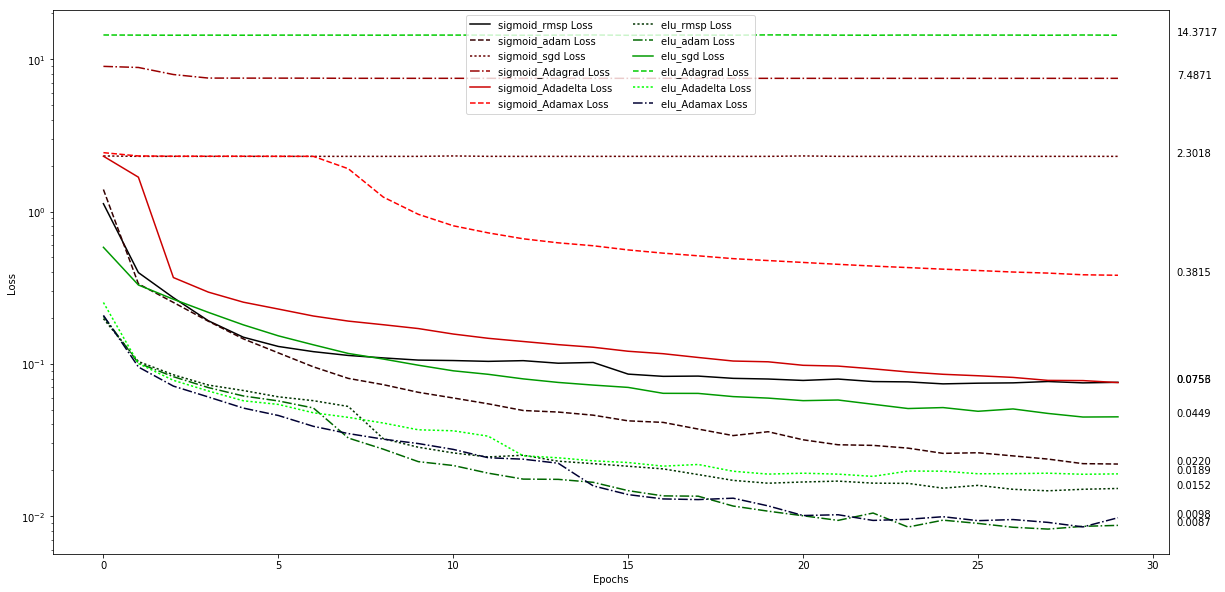

In [101]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

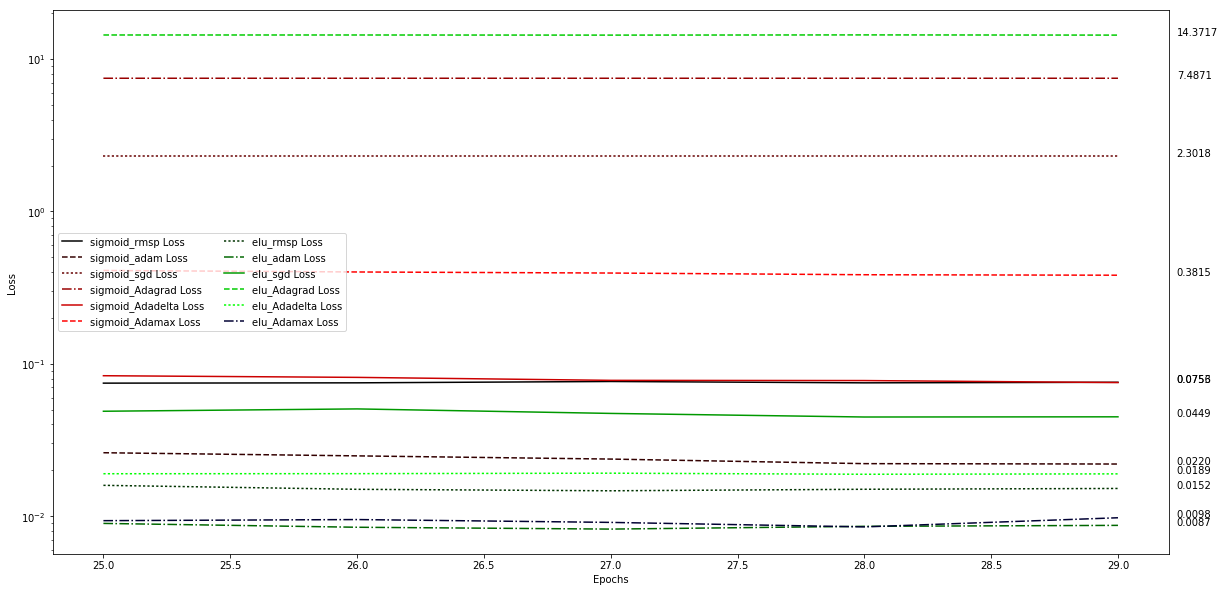

In [102]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [103]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
7,elu_adam,0.997150,0.008698,0.9903,0.040133,adam,elu,28.0,14.0,28.0,14.0
11,elu_Adamax,0.996733,0.009759,0.9906,0.038118,Adamax,elu,29.0,29.0,29.0,7.0
6,elu_rmsp,0.995050,0.015194,0.9893,0.044456,rmsp,elu,28.0,24.0,28.0,11.0
10,elu_Adadelta,0.994100,0.018945,0.9899,0.035668,Adadelta,elu,26.0,25.0,23.0,19.0
1,sigmoid_adam,0.992667,0.021983,0.9900,0.035246,adam,sigmoid,29.0,29.0,30.0,26.0
8,elu_sgd,0.985283,0.044869,0.9896,0.034877,sgd,elu,29.0,30.0,29.0,30.0
4,sigmoid_Adadelta,0.977300,0.075312,0.9821,0.054057,Adadelta,sigmoid,30.0,28.0,30.0,28.0
0,sigmoid_rmsp,0.978783,0.075623,0.9849,0.051218,rmsp,sigmoid,27.0,29.0,25.0,24.0
5,sigmoid_Adamax,0.889483,0.381479,0.9486,0.179112,Adamax,sigmoid,29.0,30.0,30.0,30.0
2,sigmoid_sgd,0.110917,2.301803,0.1135,2.300946,sgd,sigmoid,3.0,1.0,3.0,3.0


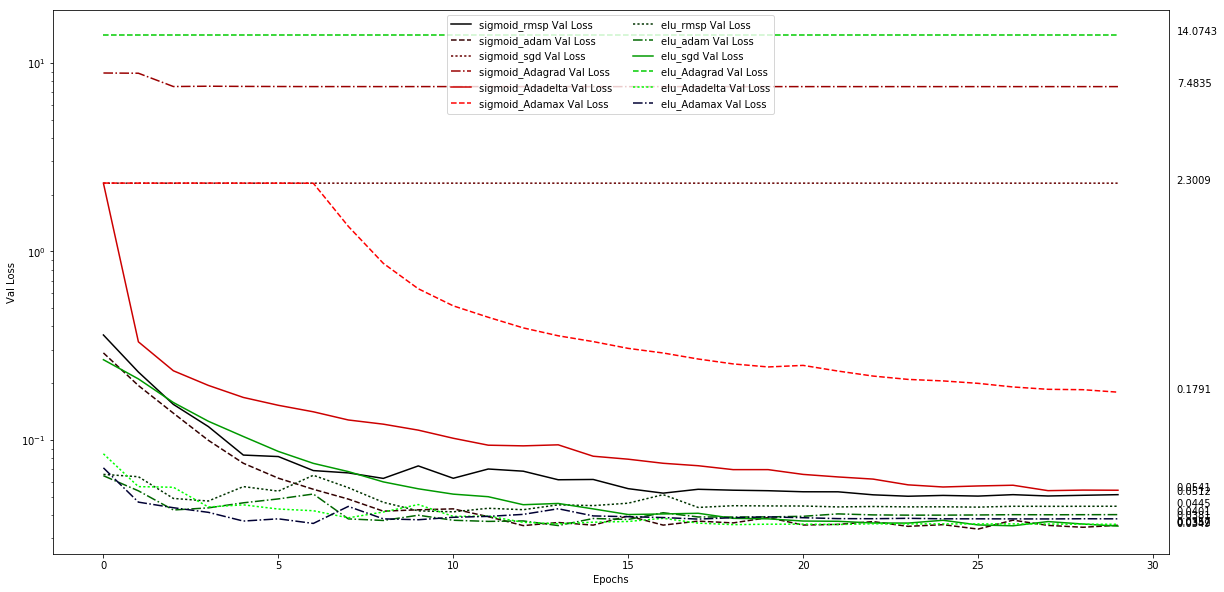

In [104]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

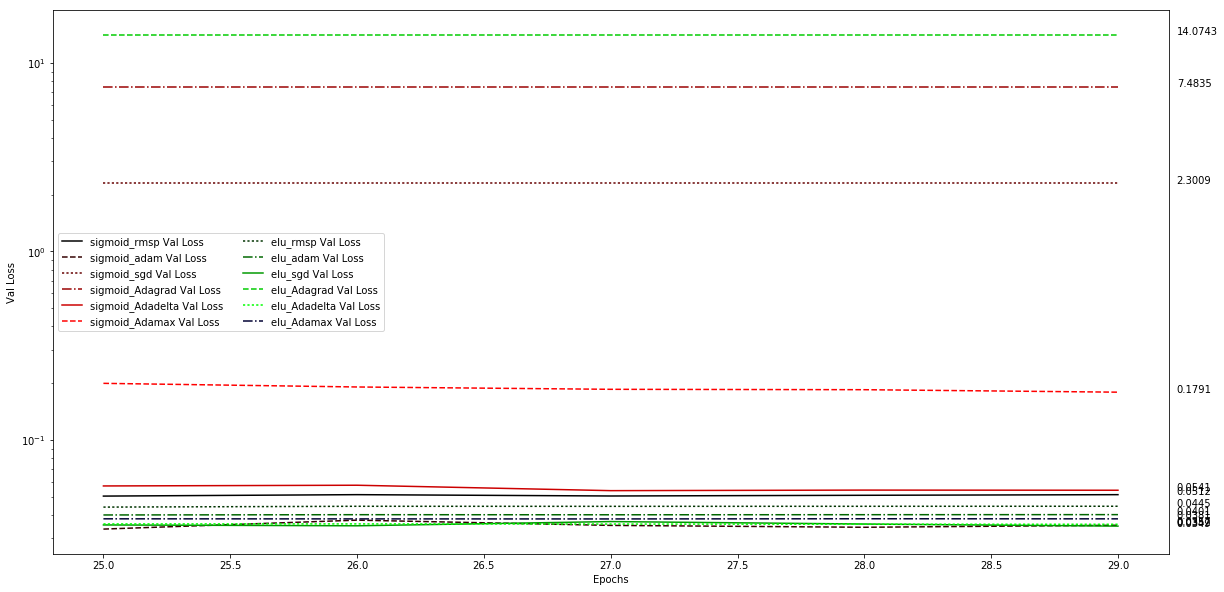

In [105]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [106]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
8,elu_sgd,0.985283,0.044869,0.9896,0.034877,sgd,elu,29.0,30.0,29.0,30.0
1,sigmoid_adam,0.992667,0.021983,0.9900,0.035246,adam,sigmoid,29.0,29.0,30.0,26.0
10,elu_Adadelta,0.994100,0.018945,0.9899,0.035668,Adadelta,elu,26.0,25.0,23.0,19.0
11,elu_Adamax,0.996733,0.009759,0.9906,0.038118,Adamax,elu,29.0,29.0,29.0,7.0
7,elu_adam,0.997150,0.008698,0.9903,0.040133,adam,elu,28.0,14.0,28.0,14.0
6,elu_rmsp,0.995050,0.015194,0.9893,0.044456,rmsp,elu,28.0,24.0,28.0,11.0
0,sigmoid_rmsp,0.978783,0.075623,0.9849,0.051218,rmsp,sigmoid,27.0,29.0,25.0,24.0
4,sigmoid_Adadelta,0.977300,0.075312,0.9821,0.054057,Adadelta,sigmoid,30.0,28.0,30.0,28.0
5,sigmoid_Adamax,0.889483,0.381479,0.9486,0.179112,Adamax,sigmoid,29.0,30.0,30.0,30.0
2,sigmoid_sgd,0.110917,2.301803,0.1135,2.300946,sgd,sigmoid,3.0,1.0,3.0,3.0


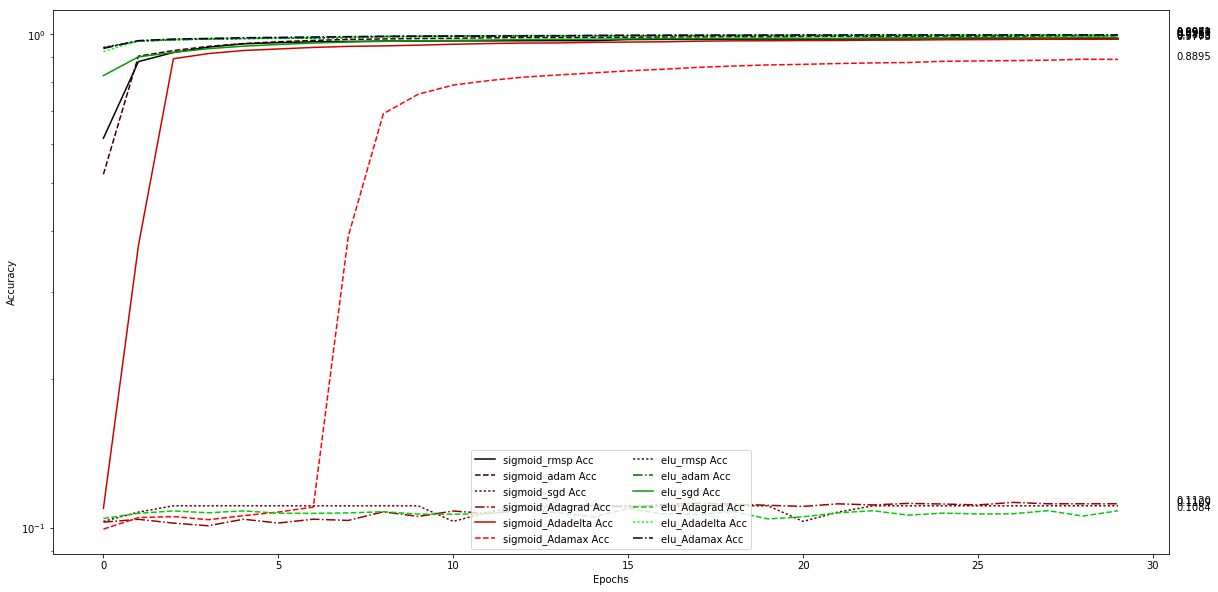

In [107]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

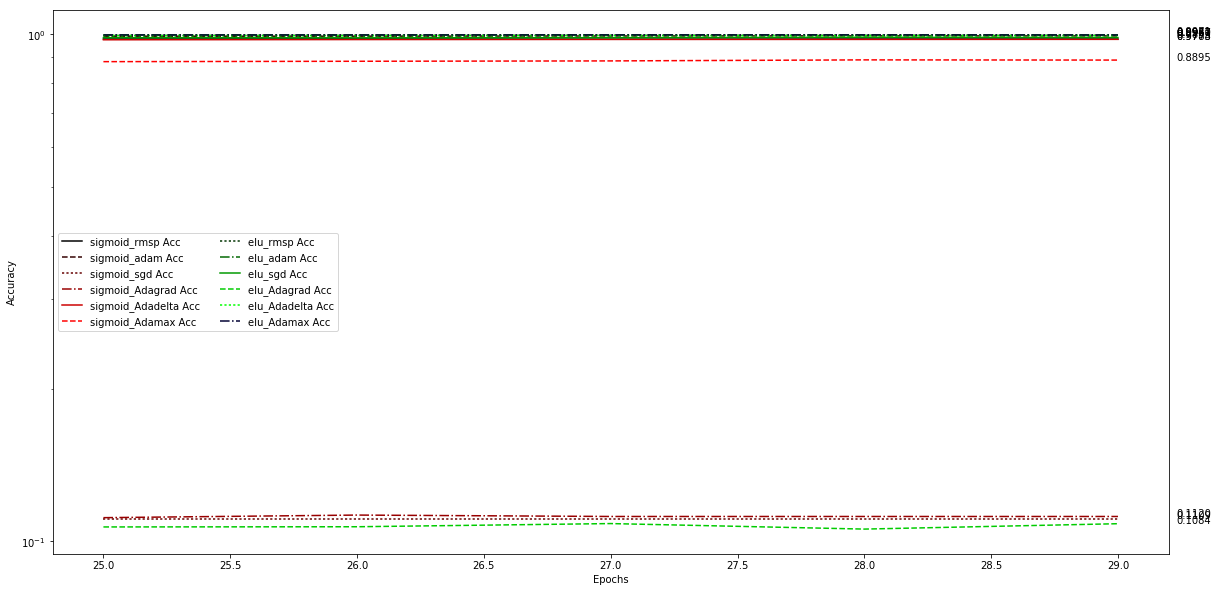

In [108]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [109]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
7,elu_adam,0.997150,0.008698,0.9903,0.040133,adam,elu,28.0,14.0,28.0,14.0
11,elu_Adamax,0.996733,0.009759,0.9906,0.038118,Adamax,elu,29.0,29.0,29.0,7.0
6,elu_rmsp,0.995050,0.015194,0.9893,0.044456,rmsp,elu,28.0,24.0,28.0,11.0
10,elu_Adadelta,0.994100,0.018945,0.9899,0.035668,Adadelta,elu,26.0,25.0,23.0,19.0
1,sigmoid_adam,0.992667,0.021983,0.9900,0.035246,adam,sigmoid,29.0,29.0,30.0,26.0
8,elu_sgd,0.985283,0.044869,0.9896,0.034877,sgd,elu,29.0,30.0,29.0,30.0
0,sigmoid_rmsp,0.978783,0.075623,0.9849,0.051218,rmsp,sigmoid,27.0,29.0,25.0,24.0
4,sigmoid_Adadelta,0.977300,0.075312,0.9821,0.054057,Adadelta,sigmoid,30.0,28.0,30.0,28.0
5,sigmoid_Adamax,0.889483,0.381479,0.9486,0.179112,Adamax,sigmoid,29.0,30.0,30.0,30.0
3,sigmoid_Adagrad,0.111967,7.487143,0.1135,7.483538,Adagrad,sigmoid,27.0,3.0,25.0,27.0


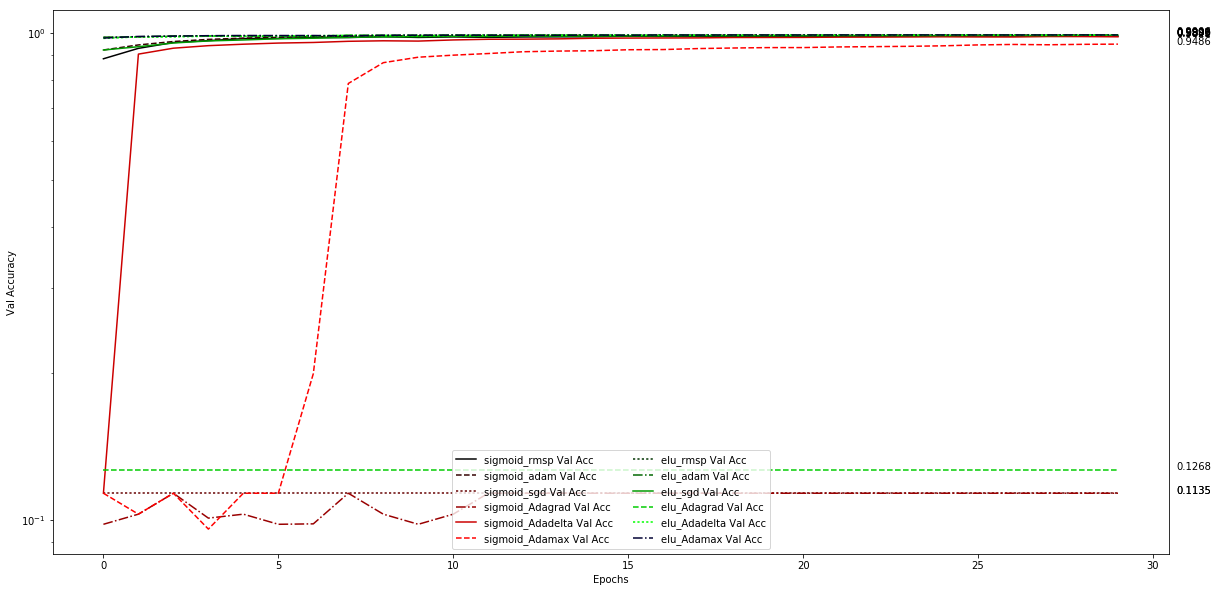

In [110]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

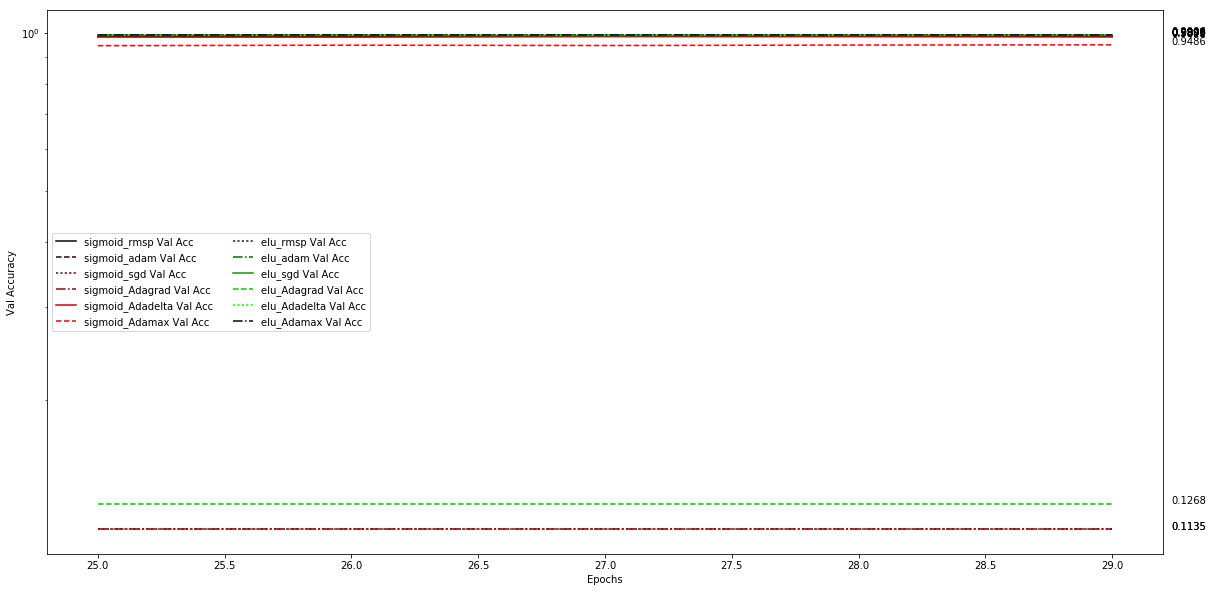

In [111]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [112]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
11,elu_Adamax,0.996733,0.009759,0.9906,0.038118,Adamax,elu,29.0,29.0,29.0,7.0
7,elu_adam,0.997150,0.008698,0.9903,0.040133,adam,elu,28.0,14.0,28.0,14.0
1,sigmoid_adam,0.992667,0.021983,0.9900,0.035246,adam,sigmoid,29.0,29.0,30.0,26.0
10,elu_Adadelta,0.994100,0.018945,0.9899,0.035668,Adadelta,elu,26.0,25.0,23.0,19.0
8,elu_sgd,0.985283,0.044869,0.9896,0.034877,sgd,elu,29.0,30.0,29.0,30.0
6,elu_rmsp,0.995050,0.015194,0.9893,0.044456,rmsp,elu,28.0,24.0,28.0,11.0
0,sigmoid_rmsp,0.978783,0.075623,0.9849,0.051218,rmsp,sigmoid,27.0,29.0,25.0,24.0
4,sigmoid_Adadelta,0.977300,0.075312,0.9821,0.054057,Adadelta,sigmoid,30.0,28.0,30.0,28.0
5,sigmoid_Adamax,0.889483,0.381479,0.9486,0.179112,Adamax,sigmoid,29.0,30.0,30.0,30.0
9,elu_Adagrad,0.108350,14.371703,0.1268,14.074324,Adagrad,elu,16.0,1.0,16.0,1.0


In [56]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
             config       acc      loss  val_acc  val_loss       opt      act  \
1      sigmoid_adam  0.997183  0.008879   0.9915  0.035084      adam  sigmoid   
4  sigmoid_Adadelta  0.985267  0.050691   0.9876  0.039324  Adadelta  sigmoid   
0      sigmoid_rmsp  0.978967  0.073984   0.9850  0.049791      rmsp  sigmoid   
5    sigmoid_Adamax  0.927100  0.254242   0.9669  0.114263    Adamax  sigmoid   
6     sigmoid_Nadam  0.895550  0.390461   0.9267  0.271237     Nadam  sigmoid   

   max_acc_epoch  max_val_acc_epoch  min_loss_epoch  min_val_loss_epoch  
1           46.0               38.0            47.0                39.0  
4           50.0               50.0            50.0                50.0  
0           42.0               39.0            45.0                50.0  
5           50.0               49.0            50.0                49.0  
6           50.0               49.0            50.0                50.0  

---Top by Val Accuracy---
             config 

In [57]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.5
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [58]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

,index,config,acc,loss,val_acc,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch,acc_score,val_acc_score,loss_score,val_loss_score,val_acc_epoch_score,total_score,total_score_norm
0,1,sigmoid_adam,0.997183,0.008879,0.9915,0.035084,adam,sigmoid,46.0,38.0,47.0,39.0,1.000000,1.000000,1.000000,1.000000,0.244898,1.922449,1.000000
1,0,sigmoid_rmsp,0.978967,0.073984,0.9850,0.049791,rmsp,sigmoid,42.0,39.0,45.0,50.0,0.979536,0.992597,0.971617,0.993510,0.224490,1.890473,0.977521
2,4,sigmoid_Adadelta,0.985267,0.050691,0.9876,0.039324,Adadelta,sigmoid,50.0,50.0,50.0,50.0,0.986613,0.995558,0.981772,0.998129,0.000000,1.786668,0.904544
3,5,sigmoid_Adamax,0.927100,0.254242,0.9669,0.114263,Adamax,sigmoid,50.0,49.0,50.0,49.0,0.921269,0.971982,0.893034,0.965057,0.020408,1.725135,0.861286
4,6,sigmoid_Nadam,0.895550,0.390461,0.9267,0.271237,Nadam,sigmoid,50.0,49.0,50.0,50.0,0.885827,0.926196,0.833649,0.895782,0.020408,1.641835,0.802724
5,2,sigmoid_sgd,0.110917,2.301803,0.1135,2.300946,sgd,sigmoid,3.0,1.0,3.0,3.0,0.004381,0.000000,0.000395,0.000037,1.000000,0.502238,0.001573
6,3,sigmoid_Adagrad,0.107017,2.302709,0.1135,2.301031,Adagrad,sigmoid,25.0,1.0,50.0,9.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000


In [59]:
sorted_by_score.to_csv('./results.csv')

In [60]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
